<a href="https://colab.research.google.com/github/Khadegaali/SVR-Support-vector/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data preprocessing

In [ ]:
df=pd.read_csv('/content/winequality-white.csv',sep=";") #read dataset

In [ ]:
df.head() #show first 5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.info()##show num of row , col ,datatype and missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df.describe() # show missing value , mean , std ( probablity)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


show outlier


In [ ]:
from scipy.stats import zscore

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

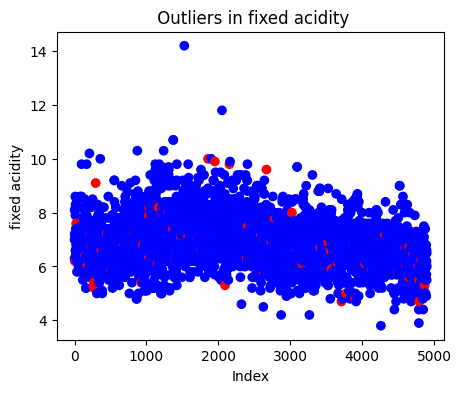

In [120]:
df['volatile acidity']=zscore(df['volatile acidity']) #calc outlier of col
outlier_mask = np.abs(df['volatile acidity']) > 3 #determine outlier

#plot outlier
colors = np.where(outlier_mask, 'red', 'blue')
plt.figure(figsize=(5, 4))
plt.scatter(np.arange(len(df['fixed acidity'])), df['fixed acidity'], c=colors)
plt.title(f" Outliers in {'fixed acidity'}")
plt.xlabel("Index")
plt.ylabel('fixed acidity')
plt.show()

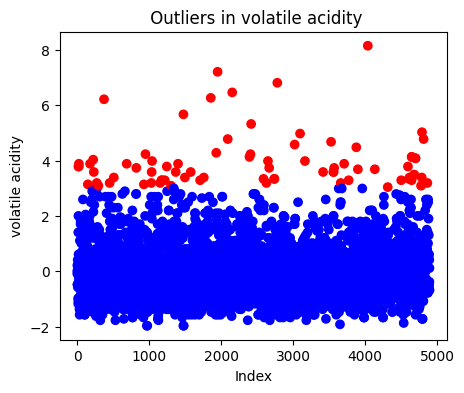

In [121]:
df['volatile acidity']=zscore(df['volatile acidity']) #calc outlier of col
outlier_mask = np.abs(df['volatile acidity']) > 3 #determine outlier
#plot outlier
colors = np.where(outlier_mask, 'red', 'blue')
plt.figure(figsize=(5, 4))
plt.scatter(np.arange(len(df['volatile acidity'])), df['volatile acidity'], c=colors)
plt.title(f" Outliers in {'volatile acidity'}")
plt.xlabel("Index")
plt.ylabel('volatile acidity')
plt.show()

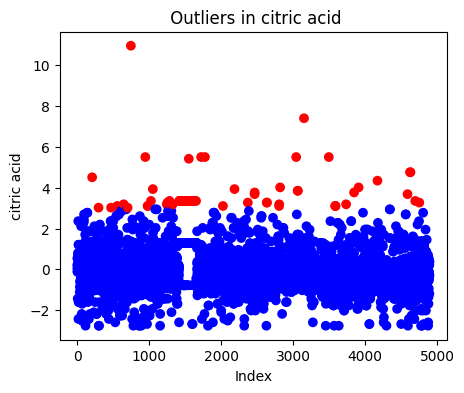

In [122]:
df[ 'citric acid']=zscore(df[ 'citric acid']) #calc outlier of col
outlier_mask = np.abs(df[ 'citric acid']) > 3 #determine outlier
#plot outlier
colors = np.where(outlier_mask, 'red', 'blue')
plt.figure(figsize=(5, 4))
plt.scatter(np.arange(len(df[ 'citric acid'])), df[ 'citric acid'], c=colors)
plt.title(f" Outliers in { 'citric acid'}")
plt.xlabel("Index")
plt.ylabel( 'citric acid')
plt.show()

In [123]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'z_fixed'],
      dtype='object')

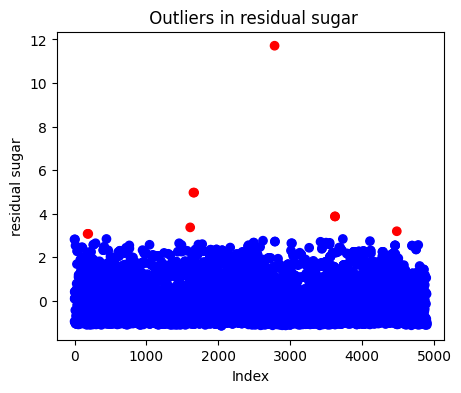

In [124]:
df['residual sugar']=zscore(df['residual sugar']) #calc outlier of col
outlier_mask = np.abs(df['residual sugar']) > 3 #determine outlier
#plot outlier
colors = np.where(outlier_mask, 'red', 'blue')
plt.figure(figsize=(5, 4))
plt.scatter(np.arange(len(df['residual sugar'])), df['residual sugar'], c=colors)
plt.title(f" Outliers in {'residual sugar'}")
plt.xlabel("Index")
plt.ylabel('residual sugar')
plt.show()

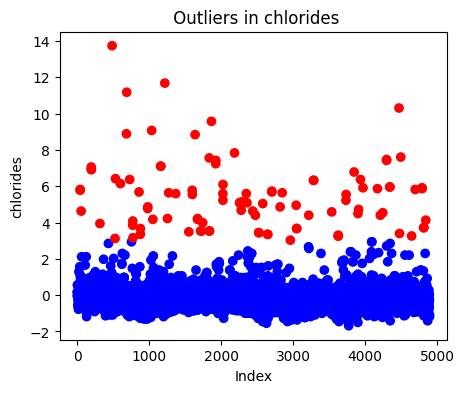

In [125]:
df[ 'chlorides']=zscore(df[ 'chlorides']) #calc outlier of col
outlier_mask = np.abs(df[ 'chlorides']) > 3 #determine outlier
#plot outlier
colors = np.where(outlier_mask, 'red', 'blue')
plt.figure(figsize=(5, 4))
plt.scatter(np.arange(len(df[ 'chlorides'])), df[ 'chlorides'], c=colors)
plt.title(f" Outliers in { 'chlorides'}")
plt.xlabel("Index")
plt.ylabel( 'chlorides')
plt.show()

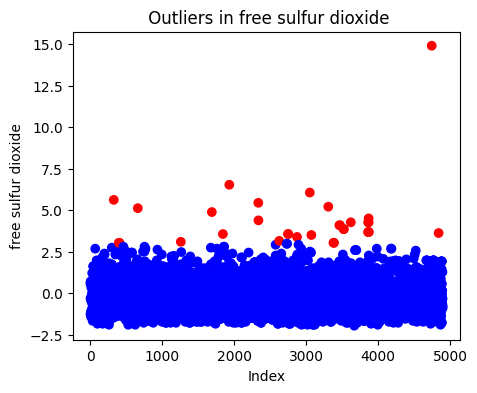

In [126]:
df['free sulfur dioxide']=zscore(df['free sulfur dioxide']) #calc outlier of col
outlier_mask = np.abs(df['free sulfur dioxide']) > 3 #determine outlier
#plot outlier
colors = np.where(outlier_mask, 'red', 'blue')
plt.figure(figsize=(5, 4))
plt.scatter(np.arange(len(df['free sulfur dioxide'])), df['free sulfur dioxide'], c=colors)
plt.title(f" Outliers in {'free sulfur dioxide'}")
plt.xlabel("Index")
plt.ylabel('free sulfur dioxide')
plt.show()

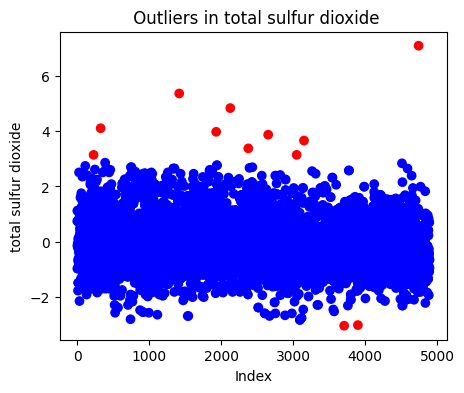

In [127]:
df['total sulfur dioxide']=zscore(df['total sulfur dioxide']) #calc outlier of col
outlier_mask = np.abs(df['total sulfur dioxide']) > 3 #determine outlier
#plot outlier
colors = np.where(outlier_mask, 'red', 'blue')
plt.figure(figsize=(5, 4))
plt.scatter(np.arange(len(df['total sulfur dioxide'])), df['total sulfur dioxide'], c=colors)
plt.title(f" Outliers in {'total sulfur dioxide'}")
plt.xlabel("Index")
plt.ylabel('total sulfur dioxide')
plt.show()

In [128]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'z_fixed'],
      dtype='object')

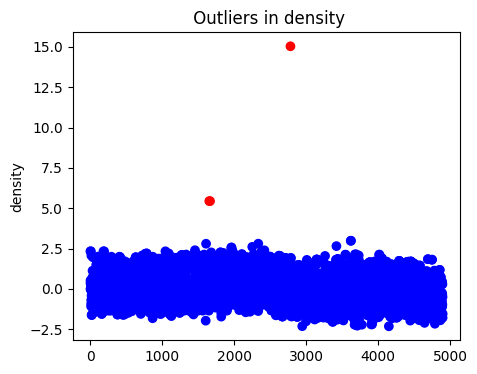

In [129]:
df['density']=zscore(df['density']) #calc outlier of col
outlier_mask = np.abs(df['density']) > 3 #determine outlier
#plot outlier
colors = np.where(outlier_mask, 'red', 'blue')
plt.figure(figsize=(5, 4))
plt.scatter(np.arange(len(df['density'])), df['density'], c=colors)
plt.title(f" Outliers in {'density'}")
plt.ylabel('density')
plt.show()

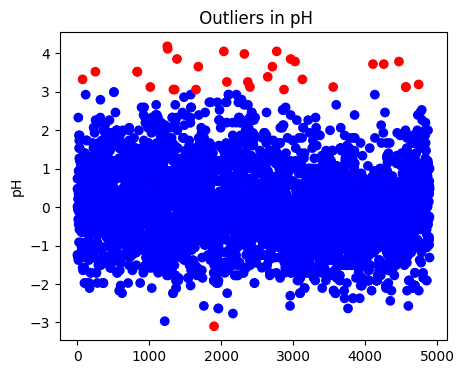

In [130]:
df[ 'pH']=zscore(df[ 'pH']) #calc outlier of col
outlier_mask = np.abs(df[ 'pH']) > 3 #determine outlier
#plot outlier
colors = np.where(outlier_mask, 'red', 'blue')
plt.figure(figsize=(5, 4))
plt.scatter(np.arange(len(df[ 'pH'])), df[ 'pH'], c=colors)
plt.title(f" Outliers in { 'pH'}")
plt.ylabel('pH')
plt.show()

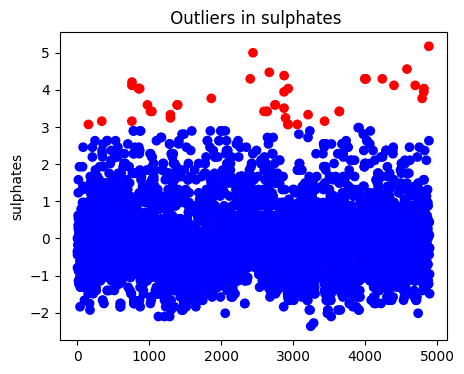

In [131]:
df['sulphates']=zscore(df['sulphates']) #calc outlier of col
outlier_mask = np.abs(df['sulphates']) > 3 #determine outlier
#plot outlier
colors = np.where(outlier_mask, 'red', 'blue')
plt.figure(figsize=(5, 4))
plt.scatter(np.arange(len(df['sulphates'])), df['sulphates'], c=colors)
plt.title(f" Outliers in {'sulphates'}")

plt.ylabel('sulphates')
plt.show()

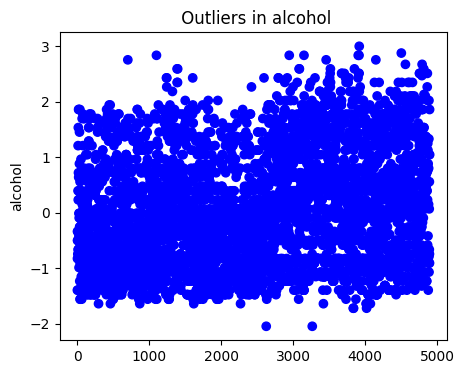

In [132]:
df['alcohol']=zscore(df['alcohol']) #calc outlier of col
outlier_mask = np.abs(df['alcohol']) > 3 #determine outlier
#plot outlier
colors = np.where(outlier_mask, 'red', 'blue')
plt.figure(figsize=(5, 4))
plt.scatter(np.arange(len(df['alcohol'])), df['alcohol'], c=colors)
plt.title(f" Outliers in {'alcohol'}")
plt.ylabel('alcohol')
plt.show()

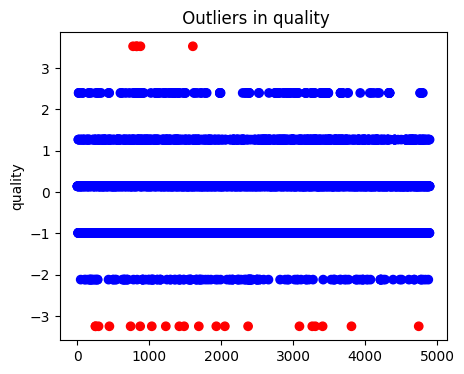

In [133]:
df['quality']=zscore(df['quality']) #calc outlier of col
outlier_mask = np.abs(df['quality']) > 3 #determine outlier
#plot outlier
colors = np.where(outlier_mask, 'red', 'blue')
plt.figure(figsize=(5, 4))
plt.scatter(np.arange(len(df['quality'])), df['quality'], c=colors)
plt.title(f" Outliers in {'quality'}")
plt.ylabel('quality')
plt.show()

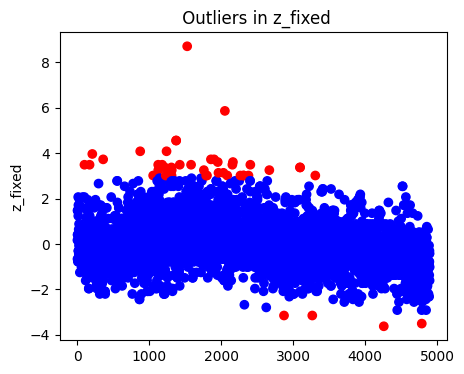

In [134]:
df['z_fixed']=zscore(df['z_fixed']) #calc outlier of col
outlier_mask = np.abs(df['z_fixed']) > 3 #determine outlier
#plot outlier
colors = np.where(outlier_mask, 'red', 'blue')
plt.figure(figsize=(5, 4))
plt.scatter(np.arange(len(df['z_fixed'])), df['z_fixed'], c=colors)
plt.title(f" Outliers in {'z_fixed'}")
plt.ylabel('z_fixed')
plt.show()

remove outlier


In [135]:
numeric_cols = df.select_dtypes(include=[np.number])

#  calc Z-score
z_scores = np.abs(zscore(numeric_cols))

#  determine outlier
outlier_mask = (z_scores > 3).any(axis=1)

#  ater remove outliers
df_clean = df[~outlier_mask]

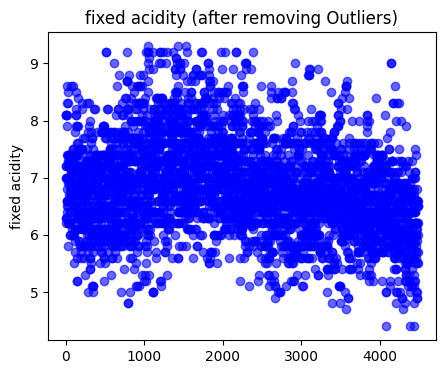

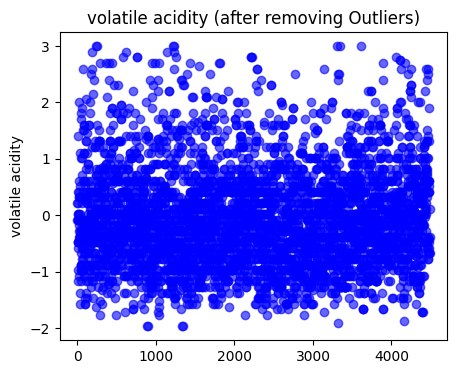

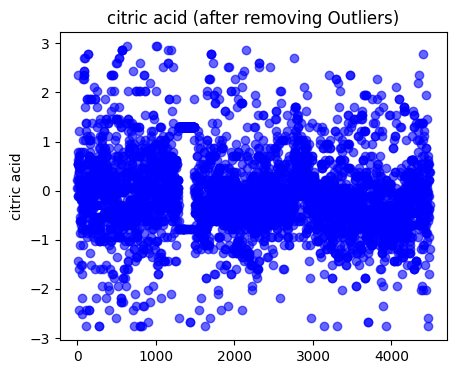

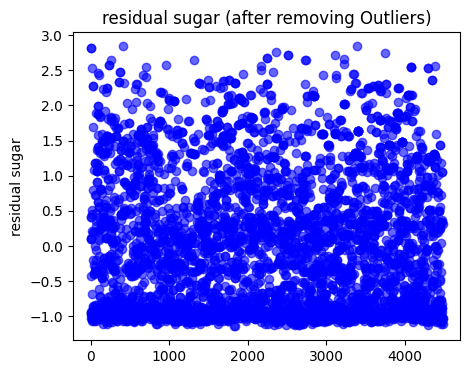

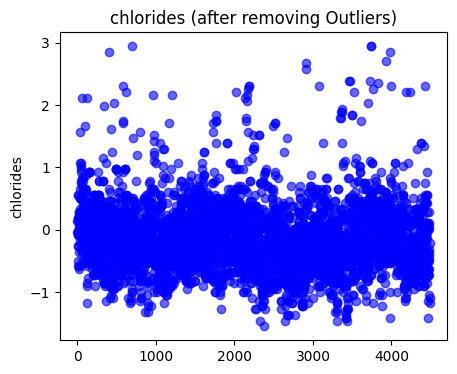

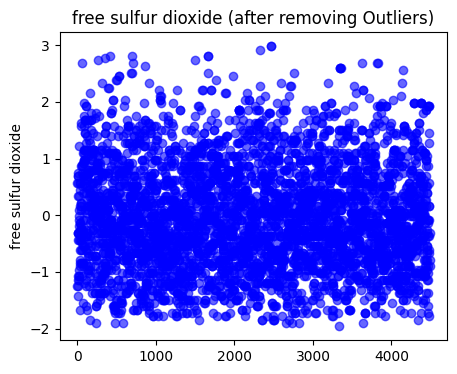

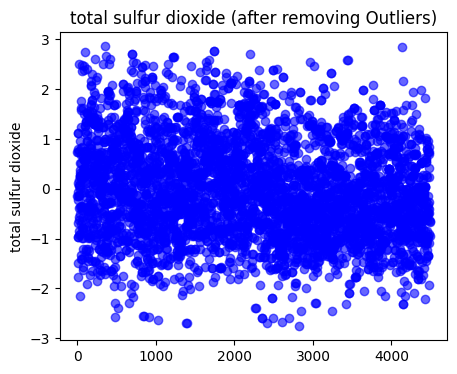

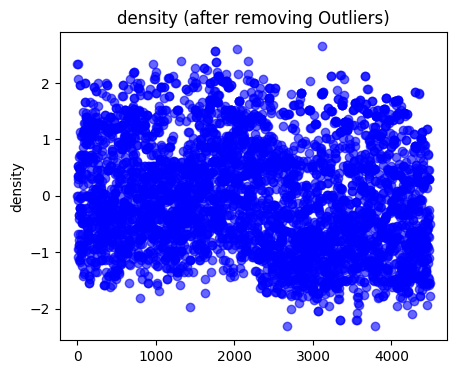

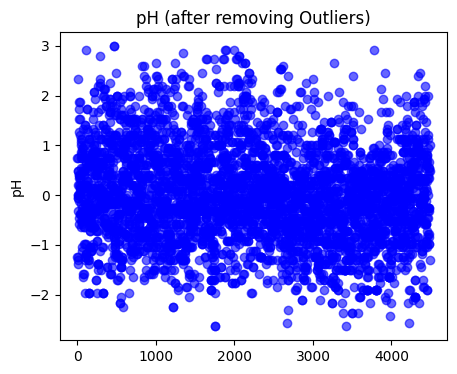

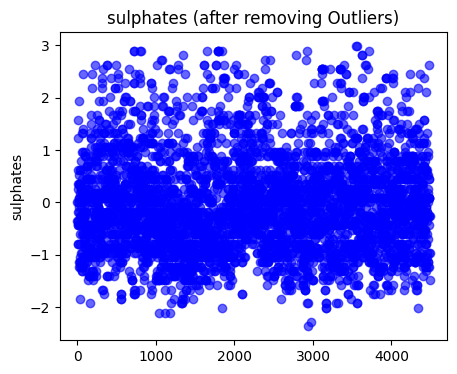

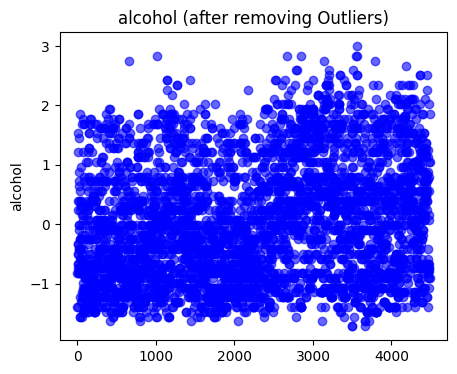

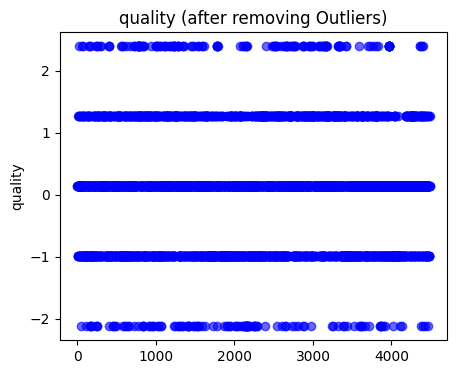

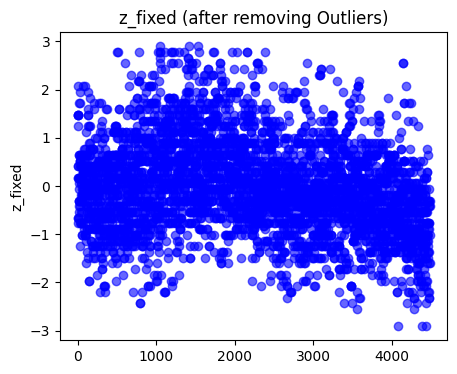

In [136]:
for col in numeric_cols.columns:
    plt.figure(figsize=(5, 4))
    plt.scatter(np.arange(len(df_clean[col])), df_clean[col], color='blue', alpha=0.6)
    plt.title(f"{col} (after removing Outliers)")
    plt.ylabel(col)
    plt.show()

In [ ]:
df.isnull().sum()#check missing value

In [ ]:
df.duplicated().sum()#check duplicated value

In [ ]:
df = df.drop_duplicates() #drop dup value

In [ ]:
df.duplicated().sum() #check after drop value

Spliting data into train and test


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop("quality", axis=1)
y = df["quality"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


build LR MODEL


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train) #train data


In [ ]:
y_pred_lr = lr.predict(x_test) #test data

evaluATE model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print(" Linear Regression:")
print("R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

 Linear Regression:
R²: 0.2597097667382343
RMSE: 0.8798919820934651


build SVR

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel="rbf", C=100, gamma=0.01, epsilon=0.2)

In [ ]:
svr.fit(x_train_scaled, y_train)

SVR(C=100, epsilon=0.2, gamma=0.01)

In [ ]:
y_pred_svr = svr.predict(x_test_scaled)

In [ ]:
print(" SVR:")
print("R²:", r2_score(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))

 SVR:
R²: 0.32068866800052587
RMSE: 0.8428742380602314


compare result between two model

In [ ]:
print(" Linear Regression:")
print("R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MSE Linear Regression:", mean_squared_error(y_test, y_pred_lr))
print(" SVR:")
print("R²:", r2_score(y_test, y_pred_svr))
print("MSE SVR:", mean_squared_error(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))

 Linear Regression:
R²: 0.2597097667382343
RMSE: 0.8798919820934651
MSE Linear Regression: 0.7742099001523667
 SVR:
R²: 0.32068866800052587
MSE SVR: 0.7104369811856157
RMSE: 0.8428742380602314


choose best parameter


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_rand = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 0.1, 0.01, 0.001],
    'svr__epsilon': [0.1, 0.2, 0.5],
    'svr__kernel': ['rbf', 'linear', 'poly']
}

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])


In [ ]:
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_rand,
    n_iter=10,          # num of random
    cv=3,               # Cross validation
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

In [ ]:
# Train
search.fit(x_train, y_train)

In [141]:
# Best parameters
print("Best Parameters:", search.best_params_)

# Predictions
y_pred_svr_best = search.predict(x_test)

Best Parameters: {'svr__kernel': 'rbf', 'svr__gamma': 0.01, 'svr__epsilon': 0.5, 'svr__C': 1}


In [ ]:
print(" SVR with randomizedsearch:")
print("R²:", r2_score(y_test, y_pred_svr_best))
print("MSE SVR:", mean_squared_error(y_test, y_pred_svr_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr_best)))

In [137]:
print(" Linear Regression:")
print("R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MSE Linear Regression:", mean_squared_error(y_test, y_pred_lr))

print(" SVR:")
print("R²:", r2_score(y_test, y_pred_svr))
print("MSE SVR:", mean_squared_error(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))

print(" SVR with randomizedsearch:")
print("R²:", r2_score(y_test, y_pred_svr_best))
print("MSE SVR:", mean_squared_error(y_test, y_pred_svr_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr_best)))

 Linear Regression:
R²: 0.2597097667382343
RMSE: 0.8798919820934651
MSE Linear Regression: 0.7742099001523667
 SVR:
R²: 0.32068866800052587
MSE SVR: 0.7104369811856157
RMSE: 0.8428742380602314
 SVR with randomizedsearch:
R²: 0.3198148675832968
MSE SVR: 0.7113508186285268
RMSE: 0.8434161598099285


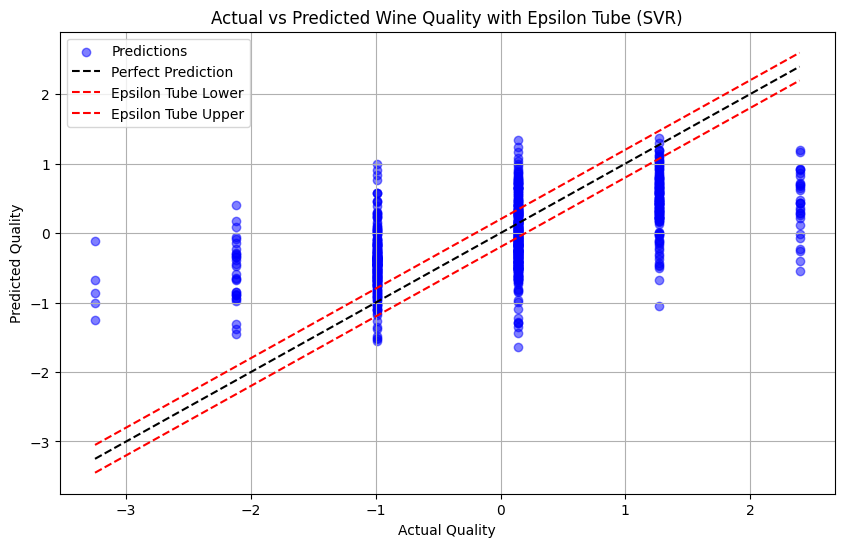

In [144]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr_best, alpha=0.5, color='blue', label='Predictions')

# Perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')

# Epsilon tube boundaries (y = x - epsilon and y = x + epsilon)
plt.plot([y_test.min(), y_test.max()], [y_test.min() - epsilon, y_test.max() - epsilon], 'r--', label='Epsilon Tube Lower')
plt.plot([y_test.min(), y_test.max()], [y_test.min() + epsilon, y_test.max() + epsilon], 'r--', label='Epsilon Tube Upper')

plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality with Epsilon Tube (SVR)')
plt.legend()
plt.grid(True)
plt.show()

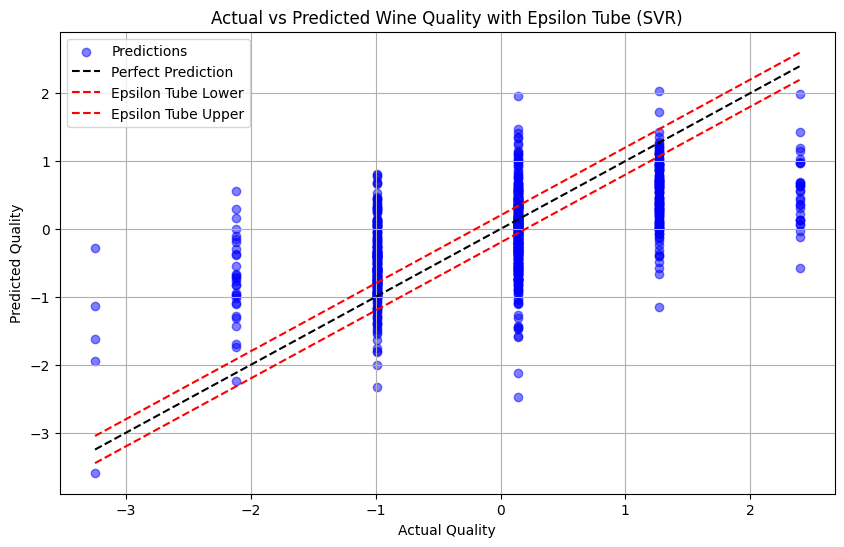

In [143]:

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5, color='blue', label='Predictions')

# Perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')

# Epsilon tube boundaries (y = x - epsilon and y = x + epsilon)
plt.plot([y_test.min(), y_test.max()], [y_test.min() - epsilon, y_test.max() - epsilon], 'r--', label='Epsilon Tube Lower')
plt.plot([y_test.min(), y_test.max()], [y_test.min() + epsilon, y_test.max() + epsilon], 'r--', label='Epsilon Tube Upper')

plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality with Epsilon Tube (SVR)')
plt.legend()
plt.grid(True)
plt.show()